## Data: Rossmann Store Sales Data

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv", low_memory= False, parse_dates= ["Date"])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
# StateHoliday should be changed to Object

# Group by Store

dfg = df.groupby("Store")
dfg

In [5]:
# Get the Mean of all Columns

dfg.mean()

# We did Mean Aggregation of the DataFrame by Store

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590
...,...,...,...,...,...,...
1111,3.997877,4342.968153,373.548832,0.826964,0.382166,0.180467
1112,3.997877,8465.280255,693.498938,0.826964,0.382166,0.180467
1113,3.997877,5516.180467,596.763270,0.832272,0.382166,0.168790


In [6]:
# Keep the Above as new dataframe
store_avg = dfg.mean().reset_index()

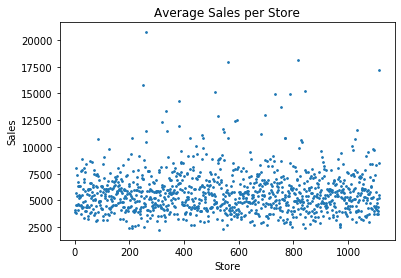

In [7]:
# Plot a Scatter Plot for Store Average and Sales

store_avg.plot.scatter("Store", "Sales", s=3, title= "Average Sales per Store"); # s - size

### Multiple Groupings

Group in Multiple Categories

In [8]:
# Group Stores by Day

store_day = df.groupby(["Store", "DayOfWeek"], as_index= False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


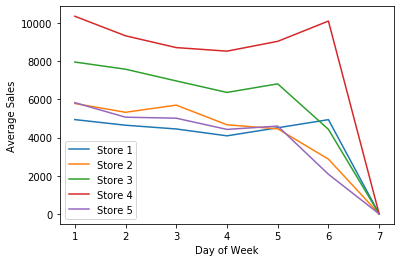

In [9]:
# Get the First 5 Store Data and Plot it

for store in df.Store.unique()[:5]:
    df_temp = store_day[store_day.Store == store]
    plt.plot(df_temp.DayOfWeek, df_temp.Sales, label= f'Store {store}')

plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.legend();

### Grouping by Continuous Data

Grouping on Numerical/Continuous Data

In [10]:
# Continuous Grouping

df.groupby("Sales").mean().shape

(21734, 6)

In [11]:
# We Apply Cut Method and try Grouping (binning) the data based on 25,50,75 percentile

df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [12]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]
cuts = pd.cut(df.Sales, bins, include_lowest= True) # include_lowest includes lower edge too (0)

df["SalesGroup"] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [13]:
# Access the Day Values for all Store and SalesGroup

df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts()

# This tells the Frequency of Any Store at any given day of the Week

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [14]:
# To Get the Above in Clear Visual Form use

df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value= 0) # fill_value Fills NaN by given no (0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [15]:
# Group the Data of Stores, Sales and Day of Week

df.groupby(["Store", "Sales", "DayOfWeek"]).count()

Date  Customers  Open  Promo  StateHoliday  \
Store Sales DayOfWeek                                               
1     0     1             6          6     6      6             6   
            2             1          1     1      1             1   
            3             3          3     3      3             3   
            4            11         11    11     11            11   
            5             6          6     6      6             6   
...                     ...        ...   ...    ...           ...   
1115  11641 1             1          1     1      1             1   
      11673 5             1          1     1      1             1   
      11768 1             1          1     1      1             1   
      12214 2             1          1     1      1             1   
      12491 1             1          1     1      1             1   

                       SchoolHoliday  SalesGroup  
Store Sales DayOfWeek                             
1     0     1                      6           6  
            2                      1           1  
            3                      3           3  
            4                     11          11  
            5                      6           6  
...                              ...         ...  
1115  11641 1                      1           1  
      11673 5                      1           1  
      11768 1                      1           1  
      12214 2                      1           1  
      12491 1                      1           1  

[836808 rows x 7 columns]

### Intelligent Imputation

In [16]:
df = pd.read_csv("train.csv", low_memory= False, parse_dates= ["Date"])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


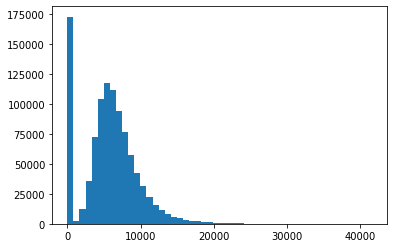

In [18]:
# Manually Corrupt the Sales Data

# Plot the Sales Data

plt.hist(df.Sales, bins= 50);

In [19]:
# Spike in 0 is for Stores Closed on Sunday. Create a DF with Open

dfo = df[df['Open'] == 1].copy()

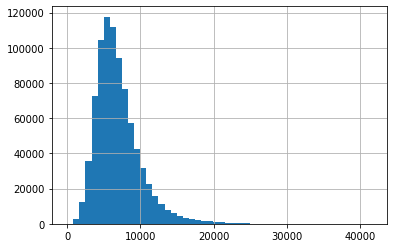

In [20]:
dfo['Sales'].hist(bins= 50);

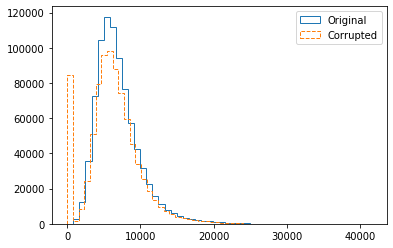

In [27]:
# Screwing Up the Data

mask = np.random.choice(10, size= dfo.shape[0]) == 0
# The Mask Randomly Flags 1 in evey 10 data points 

# Create New Column

# For Comparison between New Sales and Sales
dfo['New_Sales'] = dfo.Sales.copy()

# Set Random Columns of NewSales data to Nan - Missing Values

dfo.loc[mask, "New_Sales"] = np.nan

# Plot a Histogram of the Two

plt.hist(dfo.Sales, label="Original", histtype= "step", bins= 50)
plt.hist(dfo.New_Sales.fillna(0), label="Corrupted", histtype= "step", ls="--", bins= 50) # To Make it Show up, we plot Missing Values
plt.legend();
plt.show(); 

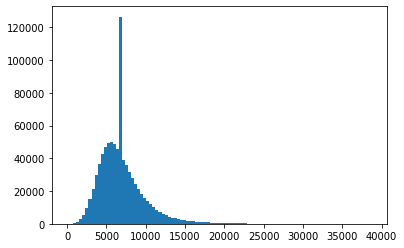

In [29]:
# Naive Fix - Using Transform
# Transform is Similar to Apply, but it has to return a Series, the same size as an Input. Requires Same size of Input & Output 

test_fix = dfo.New_Sales.transform(lambda x: x.fillna(x.mean())) # Fill by Mean on All Store

plt.hist(test_fix, bins= 100);

# Spike Corresponds to Mean Sales value of the Distribution
# Sales and Store outcome varies with week. So Use intelligent filling mechanism

In [30]:
# Fill Data by Groupby and Fill it

dfg = dfo.groupby(['Store', 'DayOfWeek'])
dfg.median() # It Corresponds to a Central Value than mean - Commonly we use Median in Case of Skewed Data

Sales  Customers  Open  Promo  SchoolHoliday  New_Sales
Store DayOfWeek                                                          
1     1          5302.5      581.0   1.0    1.0            0.0     5302.5
      2          4640.5      549.5   1.0    1.0            0.0     4574.0
      3          4549.5      533.0   1.0    1.0            0.0     4581.5
      4          4380.0      525.0   1.0    1.0            0.0     4380.0
      5          4651.0      552.0   1.0    1.0            0.0     4649.0
...                 ...        ...   ...    ...            ...        ...
1115  2          5870.5      405.0   1.0    1.0            0.0     5759.5
      3          5653.0      390.0   1.0    1.0            0.0     5539.0
      4          5666.5      397.0   1.0    1.0            0.0     5676.0
      5          6107.0      438.0   1.0    1.0            0.0     6358.0
      6          6609.5      480.0   1.0    0.0            0.0     6616.0

[6723 rows x 6 columns]

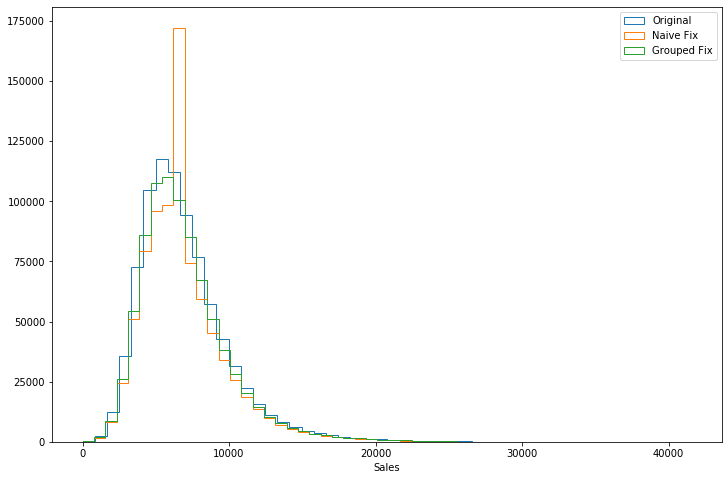

In [34]:
# Use Transform. Aggregate it to get a number, then BackFill according to the Group

test_fix2 = dfg.New_Sales.transform(lambda x: x.fillna(x.mean()))

# Plot the Data Based on the Fix

opts = {'histtype': 'step', 'bins': 50}

plt.figure(figsize= (12,8))
plt.hist(dfo.Sales, label= "Original", **opts)
plt.hist(test_fix, label= "Naive Fix", **opts)
plt.hist(test_fix2, label= "Grouped Fix", **opts)
plt.legend(), plt.xlabel("Sales");

# ** Means Unpacking the Dictionary; * - Splat Operator

# Other Ways to Look for Data before Corrupted Data (Seasonal/ Celebration days etc)

### Aggregation

mean, median, sum etc.,

In [36]:
# Single Aggregation

df.groupby('DayOfWeek').mean()

,Store,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,,,,,,
1,558.427195,7809.044510,813.065791,0.950459,0.537276,0.235335
2,558.437830,7005.244467,760.984615,0.988309,0.532596,0.251229
3,558.440778,6555.884138,721.639666,0.974400,0.532592,0.237778
4,558.423930,6247.575913,697.541486,0.923199,0.531935,0.238246
5,558.423930,6723.274305,743.150742,0.950598,0.531935,0.248449
6,558.427195,5847.562599,657.112237,0.995357,0.000000,0.018821
7,558.427195,204.183189,35.786817,0.024826,0.000000,0.018821


In [39]:
# Different Aggregates for Different COlumns

df.groupby(['Store', 'DayOfWeek']).agg({'Sales': 'mean', 'Customers': np.mean})

Sales   Customers
Store DayOfWeek                         
1     1          4946.119403  567.768657
      2          4650.918519  545.370370
      3          4454.474074  530.407407
      4          4094.607407  493.407407
      5          4516.414815  537.259259
...                      ...         ...
1115  3          5666.155556  387.022222
      4          5396.607407  372.037037
      5          6208.881481  424.518519
      6          6773.388060  482.947761
      7             0.000000    0.000000

[7805 rows x 2 columns]

In [41]:
# Different Aggregates for Same COlumn

df.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['mean', 'max', 'min', 'count'], 'Customers': [np.mean, 'count']})

Sales                      Customers      
                        mean    max   min count        mean count
Store DayOfWeek                                                  
1     1          4946.119403   9528     0   134  567.768657   134
      2          4650.918519   7959     0   135  545.370370   135
      3          4454.474074   7821     0   135  530.407407   135
      4          4094.607407   7785     0   135  493.407407   135
      5          4516.414815   8414     0   135  537.259259   135
...                      ...    ...   ...   ...         ...   ...
1115  3          5666.155556  10547     0   135  387.022222   135
      4          5396.607407  11033     0   135  372.037037   135
      5          6208.881481  11673     0   135  424.518519   135
      6          6773.388060  10898  4497   134  482.947761   134
      7             0.000000      0     0   134    0.000000   134

[7805 rows x 6 columns]

In [42]:
# Monte Carlo Uncertainity

df2 = df.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['mean', 'max', 'min'], 'Customers': 'count'})
df2.columns = ["SalesMean", "SalesMax", "SalesMin", "Count"]

df2.head()

SalesMean  SalesMax  SalesMin  Count
Store DayOfWeek                                        
1     1          4946.119403      9528         0    134
      2          4650.918519      7959         0    135
      3          4454.474074      7821         0    135
      4          4094.607407      7785         0    135
      5          4516.414815      8414         0    135

In [43]:
# Monte Carlo Uncertainity

mc_uncert = lambda x: np.std(x) / np.sqrt(x.size) # Tells about the Estimnate of Uncertainity on Mean; Assuming xxx...

# Pass the Custom Function to Group

df2 = df.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['mean', mc_uncert], 'Customers': 'count'})
df2
# Lambda is a Nameless Function

Sales             Customers
                        mean  <lambda_0>     count
Store DayOfWeek                                   
1     1          4946.119403  139.120367       134
      2          4650.918519   94.412423       135
      3          4454.474074   97.225056       135
      4          4094.607407  129.367657       135
      5          4516.414815  113.495466       135
...                      ...         ...       ...
1115  3          5666.155556  149.328727       135
      4          5396.607407  185.628174       135
      5          6208.881481  177.362439       135
      6          6773.388060  105.882850       134
      7             0.000000    0.000000       134

[7805 rows x 3 columns]

In [49]:
# Implicit Column names instead of Explicitly creating Column Names for <Lambda_0> - Passing a Tuple

df2 = df.groupby(['Store', 'DayOfWeek']).agg({'Sales': [('SalesMean','mean'), ('SalesUncertainity', mc_uncert)], \
                                              'Customers': 'count'})
df2.head()
# We Get a Nested MultiColumn Layout

Sales                   Customers
                   SalesMean SalesUncertainity     count
Store DayOfWeek                                         
1     1          4946.119403        139.120367       134
      2          4650.918519         94.412423       135
      3          4454.474074         97.225056       135
      4          4094.607407        129.367657       135
      5          4516.414815        113.495466       135

In [52]:
# Another Most used way for Monte Carlo Uncertainity

def mc_uncert2(x):
    return np.std(x) / np.sqrt(x.size)

dfg = df.groupby(['Store', 'DayOfWeek'])

# Specify Key Value Pairs instead of Dictionaries - Key : (ColumnName, Function)
# For This We Need a named Function - lambda is not a named function, so mc_uncert wont work

dfg.agg(
    SalesMean = ("Sales", "mean"),
    SalesUncert = ("Sales", mc_uncert2),
    CustomerCount = ("Customers", "count")
).reset_index().head()

# We get Flat 2d Column

,Store,DayOfWeek,SalesMean,SalesUncert,CustomerCount
0,1,1,4946.119403,139.120367,134
1,1,2,4650.918519,94.412423,135
2,1,3,4454.474074,97.225056,135
3,1,4,4094.607407,129.367657,135
4,1,5,4516.414815,113.495466,135
